> **[학습 목표]**
* 탐색적 데이터 분석(Explolatory Data Analysis: EDA)의 필요성을 안다.
* 특징(특성)이 무엇인지를 알고 다양한 특징별로 그래프를 그려 본다.
* 가시화를 통해서 데이터를 통찰할 수 있음을 안다.

> **[출제 문항]**
* 시본의 countplot 메서드(또는 다른 그래프 작성용 메서드)를 사용해 타이타닉 데이터를 다양하게 분석해 보시오.
    * 특징 값을 바꿔 가며 그래프를 10개 이상 생성합니다.
    * 각 그래프에 담긴 의미를 분석해 통찰하고, 이를 글로 정리해 그래프 아래 텍스트셀에 적습니다.
    

# 1. 필요한 모듈, 라이브러리 import

### 1-1. 필요한 라이브러리 import

In [ ]:
# data analysis libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings libarary
import warnings
warnings.filterwarnings("ignore")

### 1-2. 공유 받은 ipynb 에서 환경 설정을 위해 가져온 코드

In [ ]:
# 맷플롯립에서 폰트매지저(글꼴 관리자)를 가져온다.
import matplotlib.font_manager as fm

# 폰트 파일 설치
!apt-get -qq -y install fonts-nanum > /dev/null

# 글꼴 선택.
fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareRound.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

fm._rebuild()

# 맷플롯립에서 사용할 글꼴 지정
matplotlib.rc('font', family='NanumSquareRound') 

# 그래프 축에서 음수 부호를 쓸 수 있게 구성
matplotlib.rc('axes', unicode_minus=False)

fm._rebuild()

# 파이플롯에서 사용할 글꼴만 지정하고 싶다면 위 문장 대신 아래 문장 사용
#plt.rc('font', family='NanumSquareRound') 

# 2. Reading Dataset

In [ ]:
# 타이타닉 데이터를 가져온다. 
titanic = sns.load_dataset("titanic")

### 2-1. Data set 정보 확인

In [ ]:
# 데이터에 대한 정보 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Titanic dataset Feature 확인

- survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
- pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex - 성별
- Age - 나이(세)
- sibsp - 함께 탑승한 형제자매, 배우자 수 총합
- parch - 함께 탑승한 부모, 자녀 수 총합
- ticket - 티켓 넘버
- fare - 탑승 요금
- cabin - 객실 넘버
- bembarked - 탑승 항구

In [ ]:
# 데이터의 행렬 사이즈 출력 (row, column)
print(titanic.shape)

(891, 15)


In [ ]:
# data의 상위 5개 항목 출력
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 결측치 확인
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# dataset Summary
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3. EDA & Visualization

### 3-1. Survived

In [ ]:
# value_counts 함수로 생존자와 사망자 인원 확인
titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

-> 사망자는 549 명이고, 생존자는 342명 임을 확인 할 수 있습니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


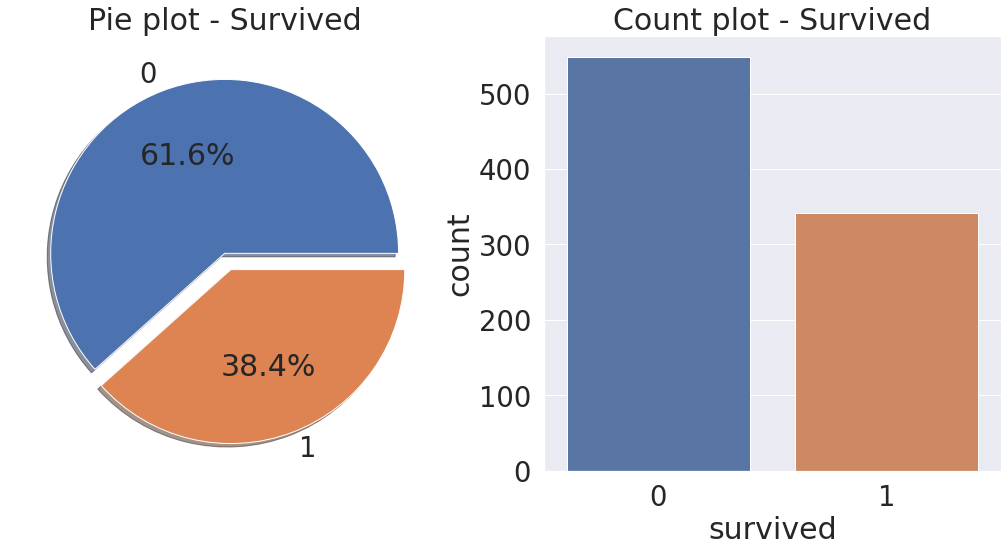

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic["survived"].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 위에서 확인한 내용을 Pie plot 와 Count plot 를 통해 시각화 진행을 통해 사망자 (0)와 생존자 (1)의 비율을 시각적으로 확인 할 수 있습니다.

### 3-2. PClass

- Pclass는 서수형 데이터입니다. 즉, 카테고리이면서 순서가 있는 데이터 타입입니다. 먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다.

- 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다. 또한 pivot 이라는 메소드도 있습니다.

- Pclass,Survived 를 가져온 후, pclass 로 묶습니다. 그러고 나면 각 pclass 마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옵니다.

- 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지 확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1) 사람의 총합을 주게 됩니다.

In [18]:
# pclass 그룹 별 data 카운트
titanic[['pclass', 'survived']].groupby(['pclass'], as_index=True).count()

,survived
pclass,
1,216
2,184
3,491


In [20]:
# pclass 그룹 별 생존자 수 합
titanic[['pclass', 'survived']].groupby(['pclass'], as_index=True).sum()

,survived
pclass,
1,136
2,87
3,119


In [21]:
# crosstab을 통해 사망자와 생존자를 확인할 수 있습니다.
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [22]:
# mean을 통해 생존률을 구할 수 있습니다.
titanic[['pclass', 'survived']].groupby(['pclass'], as_index=True).mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


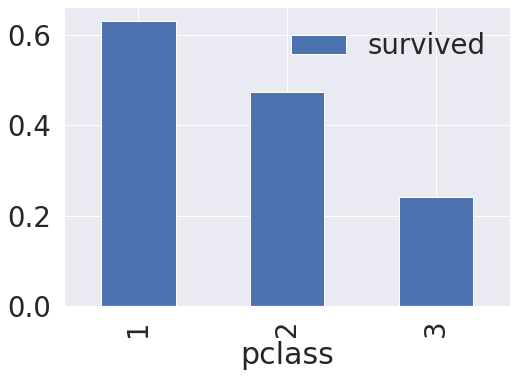

In [23]:
# Pclass 에 따른 생존자 비율 Visualization
titanic[['pclass', 'survived']].groupby(['pclass'], as_index=True).mean().plot.bar()

-> 그래프 시각화 결과를 통해서 Pclass 즉, 1등석, 2등석, 3등석에 따라 평균 생존율이 변하는 것을 통해서 Pclass가 생존에 영향을 끼치는 Feature임을 추측할 수 있습니다.

### 3-3. sex

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


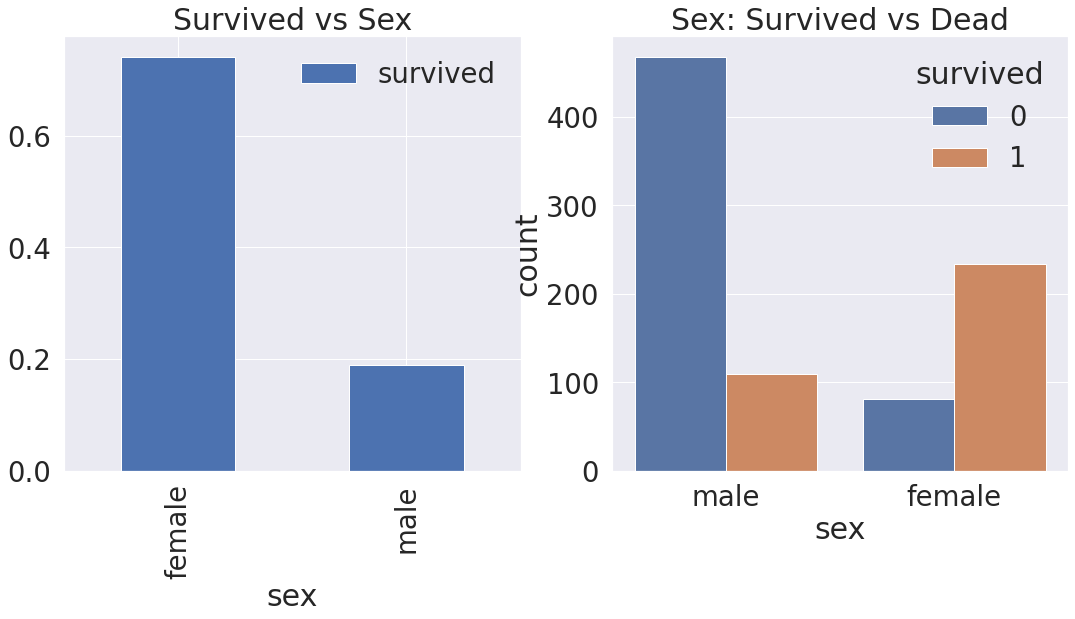

In [24]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
titanic[['sex', 'survived']].groupby(['sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('sex', hue='survived', data=titanic, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

-> 성별에 따른 생존확률을 시각화해본 결과 여성의 생존율이 더 높은 걸을 확인 할 수 있는데, 성별 또한 생존과 연관된 Feature 임을 추측할 수 있습니다.

### 3-4. Both Sex and Pclass

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


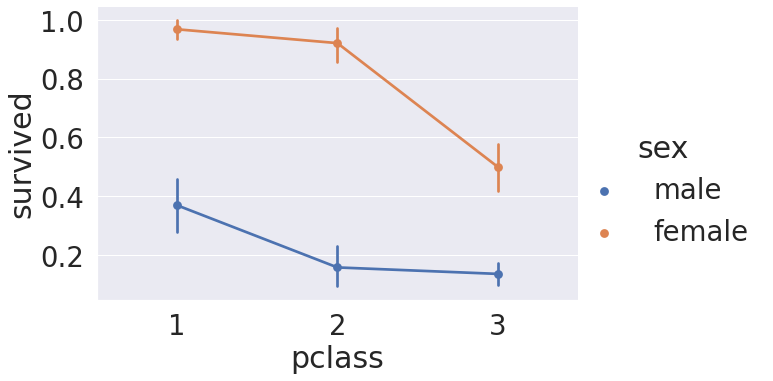

In [25]:
sns.factorplot('pclass', 'survived', hue='sex', data=titanic, size=6, aspect=1.5)

-> Pclass 에 따른 남녀 성별에 따른 생존율을 시각화해 본 결과, 여성의 생존확률이 남성보다 압도적으로 높음을 확인 할 수 있습니다.



### 3-4. Age

In [26]:
print(f"제일 나이 많은 탑승객 : {titanic['age'].max():.1f} years old.")
print(f"제일 어린 탑승객 : {titanic['age'].min():.1f} years old.")
print(f"탑승객 평균 나이 : {titanic['age'].mean():.1f} years old.")

제일 나이 많은 탑승객 : 80.0 years old.
제일 어린 탑승객 : 0.4 years old.
탑승객 평균 나이 : 29.7 years old.


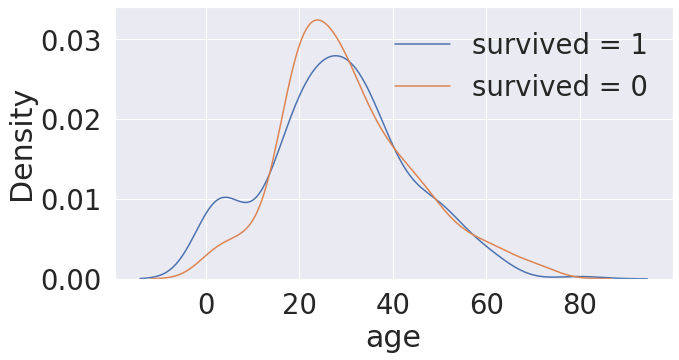

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(titanic[titanic['survived'] == 1]['age'], ax=ax)
sns.kdeplot(titanic[titanic['survived'] == 0]['age'], ax=ax)
plt.legend(['survived = 1', 'survived = 0'])
plt.show()

-> Age에 따른 생존률을 시각화해 본 결과, 연령이 어릴 수록 생존 확률이 높음을 확인 할 수 있었습니다.

### 3-5. Both Age ans Pclass

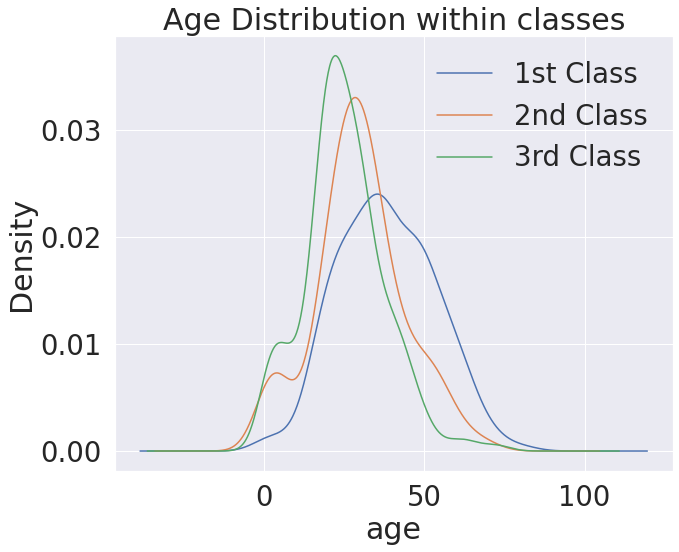

In [29]:
plt.figure(figsize=(10, 8))
titanic['age'][titanic['pclass'] == 1].plot(kind='kde')
titanic['age'][titanic['pclass'] == 2].plot(kind='kde')
titanic['age'][titanic['pclass'] == 3].plot(kind='kde')

plt.xlabel('age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

-> Pclass에 따른 Age를 시각화해 보니, 연령이 높을수록, 상위 클래스일 확률이 높음을 확인 할 수 있습니다.  

### 3-6. Both Age and Survived

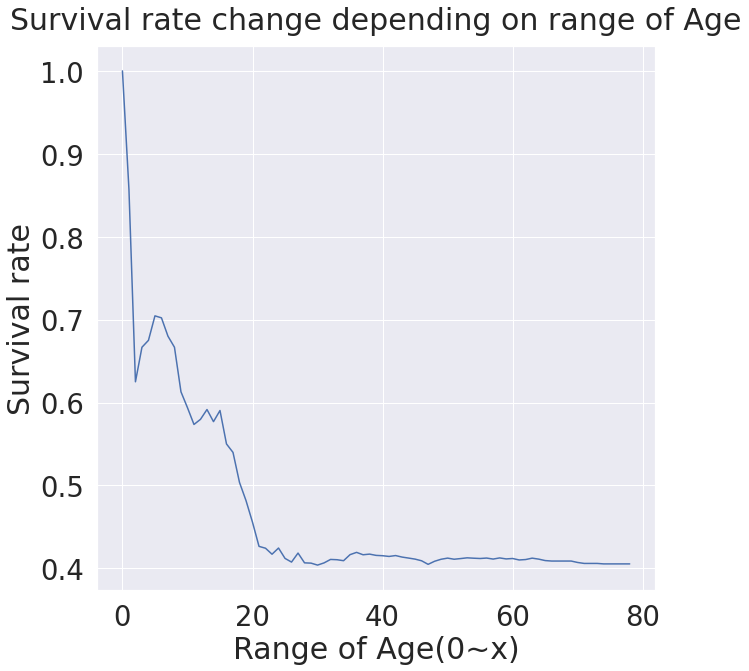

In [30]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(titanic[titanic['age'] < i]['survived'].sum() / len(titanic[titanic['age'] < i]['survived']))
    
plt.figure(figsize=(10, 10))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

-> Age 에 따른 Survived 비율을 확인해본 결과, 연령이 어릴 수록 생존확률이 높음을 확인 할 수 있습니다.

### 3-7. Embarked

Embarked는 탑승한 항구를 의미합니다.

In [32]:
titanic['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

-> 타이타닉에 탑승한 승객이 S, C, Q, nan 중 하나의 항구라고 생각하면 될 듯 싶습니다.

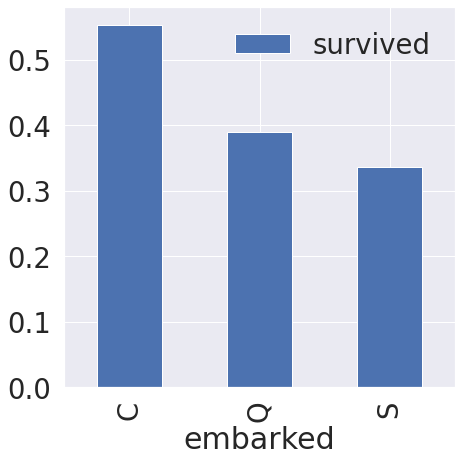

In [33]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
titanic[['embarked', 'survived']].groupby(['embarked'], as_index=True).mean().sort_values(by='survived', ascending=False).plot.bar(ax=ax)

-> 우선, 항구에 따른 생존율을 확인해본 결과, C, Q, S 항구 순으로 생존자가 분포 되어 있음을 확인 할 수 있습니다.

### 3-8. Visualize the correlation between Emvarked and other variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

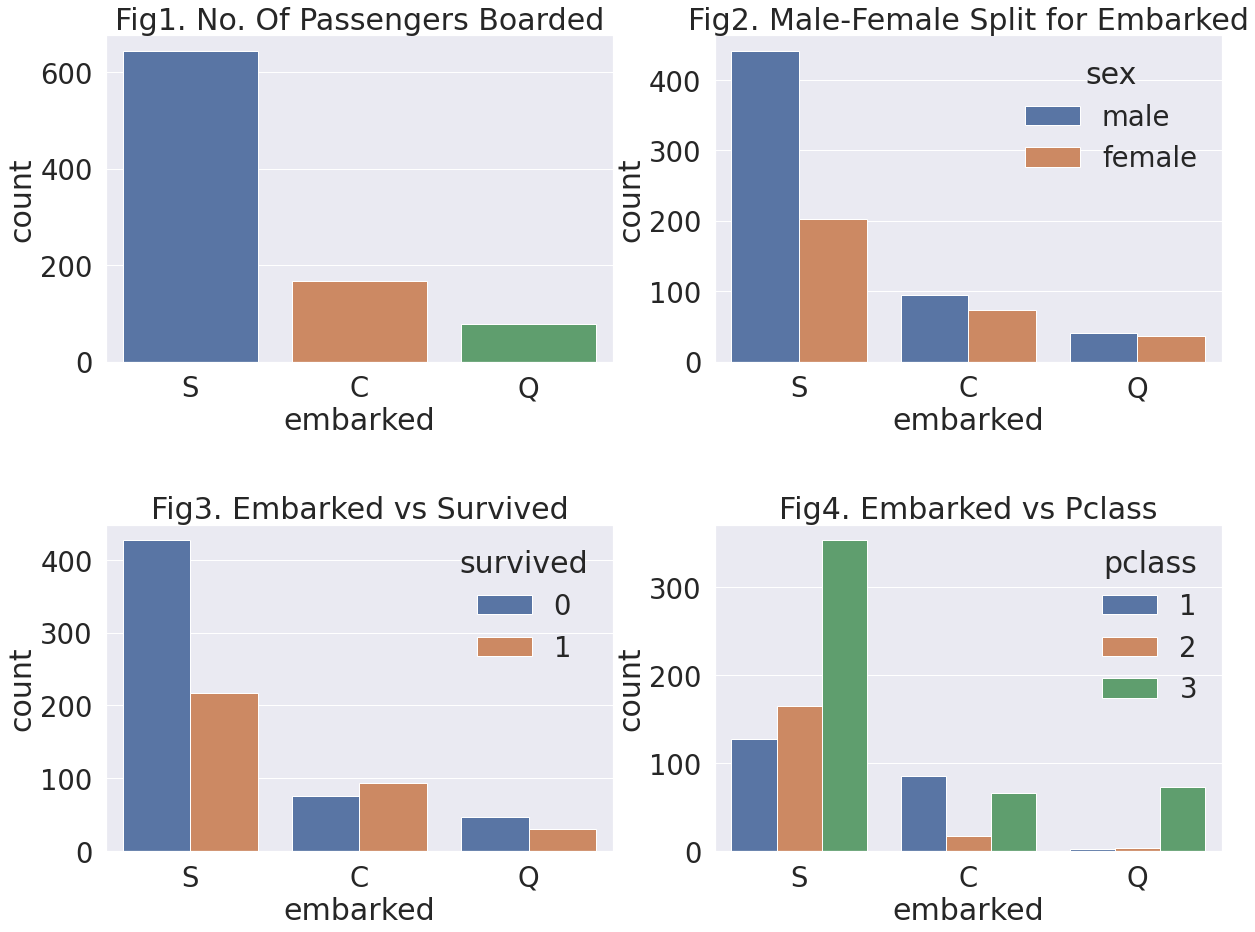

In [35]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('embarked', data=titanic, ax=ax[0,0])
ax[0,0].set_title('Fig1. No. Of Passengers Boarded')
sns.countplot('embarked', hue='sex', data=titanic, ax=ax[0,1])
ax[0,1].set_title('Fig2. Male-Female Split for Embarked')
sns.countplot('embarked', hue='survived', data=titanic, ax=ax[1,0])
ax[1,0].set_title('Fig3. Embarked vs Survived')
sns.countplot('embarked', hue='pclass', data=titanic, ax=ax[1,1])
ax[1,1].set_title('Fig4. Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Fig1 : S에서 가장 많은 사람이 탑승하였음을 확인할 수 있습니다.
- Fig2 : C, Q는 남녀 비율이 비슷한 반면 S로는 남성이 많이 탑승하였음을 확인할 수 있습니다.
- Fig3 : 각 탑승한 항구에 따른 생존율은 S의 경우 유달리 낮은 걸 볼 수 있습니다.
- Fig4 : Fig3과 함께 보았을 때, C는 사망을 한 인원보다 생존을 한 인원이 더 많은데, 이는 클래스가 높은 사람들의 비율이 높아서 그런 것이라고 추측할 수 있습니다.

### 3-9. Familysize = SibSp(형제 자매) + Parch(부모, 자녀)

- 형제 자매, 부모 자녀를 합치면 함께 탑승한 가족의 수가 됩니다. 이를 이용해 새로운 feature를 만들어보겠습니다.

In [37]:
titanic['familysize'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['familysize'] = titanic['sibsp'] + titanic['parch'] + 1

In [38]:
print("Maximum size of Family: ", titanic['familysize'].max())
print("Minimum size of Family: ", titanic['familysize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


-> SibSp(형제 자매) + Parch(부모, 자녀) 데이터로 Familysize를 만들어서 그 크기를 확인해보니, 1명 부터 11명까지의 인원으로 구성되어 있음을 확인 할 수 있습니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


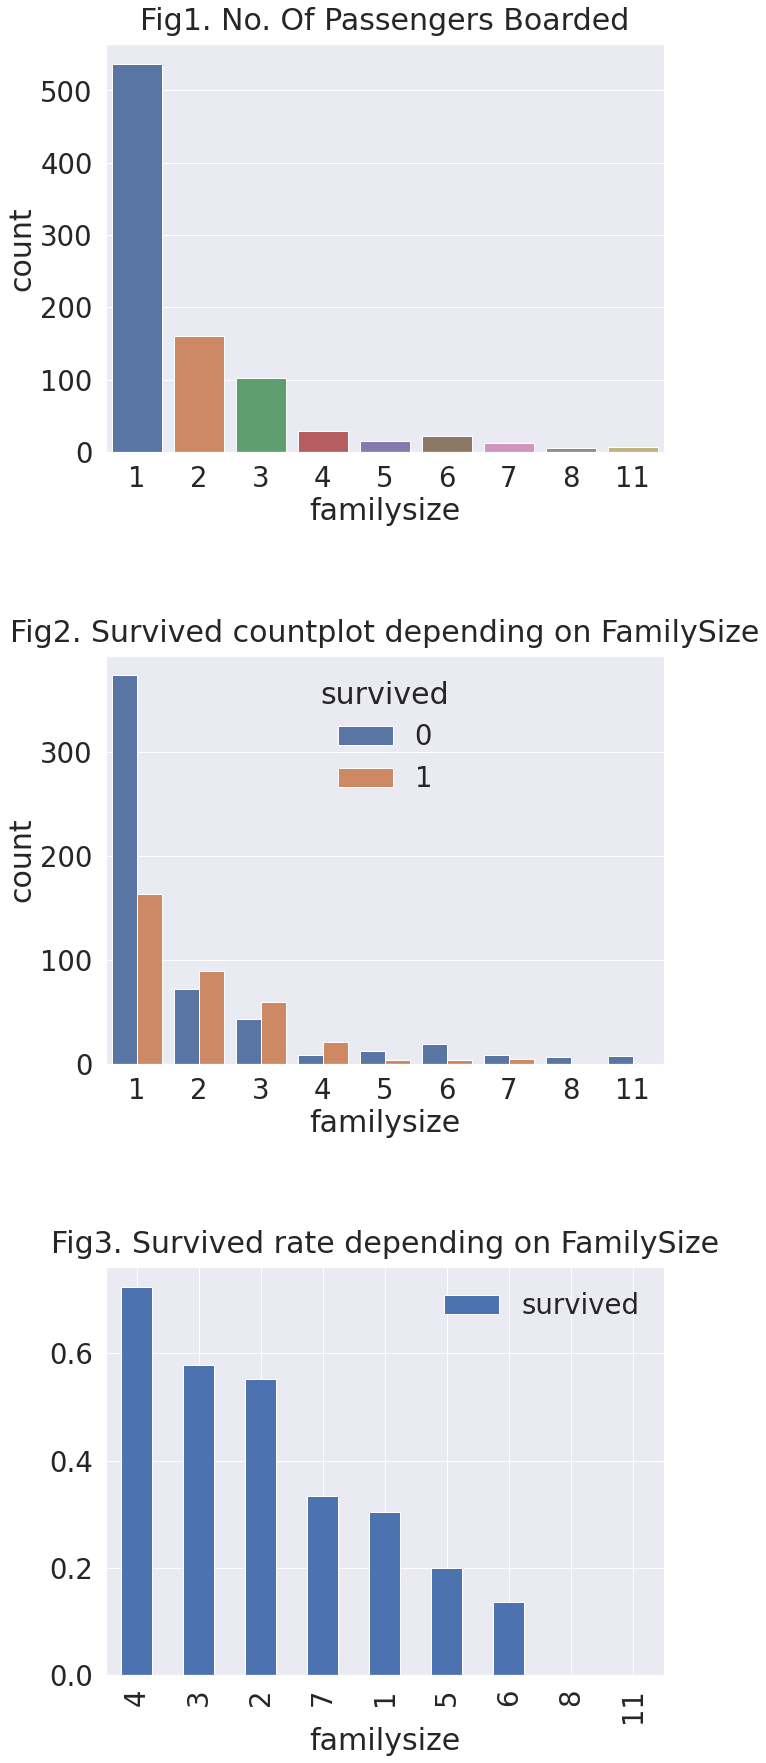

In [50]:
f,ax=plt.subplots(3, 1, figsize=(10,30))
sns.countplot('familysize', data=titanic, ax=ax[0])
ax[0].set_title('Fig1. No. Of Passengers Boarded', y=1.02)

sns.countplot('familysize', hue='survived', data=titanic, ax=ax[1])
ax[1].set_title('Fig2. Survived countplot depending on FamilySize',  y=1.02)

titanic[['familysize', 'survived']].groupby(['familysize'], as_index=True).mean().sort_values(by='survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('Fig3. Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Fig1 : familysize는 1~11명으로 분포 되어 있으며, 그 중에서 홀로 탑승한 인원이 가장 많음을 확인 할 수 있습니다.
- Fig2, 3 : familysize 에 따른 생존율을 확인 할 수 있습니다. 4인으로 구성된 조합이 생존 확률이 가장 높음을 확인 할 수 있으며, 홀로 탑승하신 분들의 생존율이 가장 낮음을 확인 할 수 있습니다.

[Reference](https://www.kaggle.com/code/jeongjaenam/guide-kor-dg/notebook) Kaggle - 데이터 분석 어떻게 시작해야 하나요?